In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import sys
import numpy.linalg as linal

sys.path.append(os.path.join('D:\PRML\pyblish','plots'))
import publish

### **Initialiazing the different Datasets**

In [2]:
train = pd.read_csv(r'.\Train-9.csv')
xtrain = train[['x1', 'x2']].to_numpy()
ytrain = train[['label']].to_numpy()

test  = pd.read_csv(r'.\Test-9.csv')
xtest = test[['x1', 'x2']].to_numpy()
ytest = test[['label']].to_numpy()

val   = pd.read_csv(r'.\Val-9.csv')
xval = val[['x1', 'x2']].to_numpy()
yval = val[['label']].to_numpy()

### **Data separation and visualisation for classes**

In [3]:
def separate(x,y) :

    class0 = np.array([0,0])
    class1 = np.array([0,0])

    for i in range(len(y)) :
        if y[i,0] == 0 :
            class0 = np.vstack((class0,x[i,:]))
        elif y[i,0] == 1 :
            class1 = np.vstack((class1,x[i,:]))

    class0 = np.delete(class0, 0, axis=0)
    class1 = np.delete(class1, 0, axis=0)

    return class0, class1

In [4]:
def visualise_data(x,y,str) :

    class0,class1 = separate(x,y)

    for label,color in [[class0, 'r'], [class1, 'b']] : 
        plt.scatter(label[:,0], label[:,1],color=color)

    plt.legend(['train class 0', 'train class 1', 'test data class 0', 'test data class 1'])
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(f'Data Visualization for {str} Dataset')
    plt.margins(0,0)
    plt.xlim(-20,20)
    plt.ylim(-20,20)
    plt.savefig(f'1b_plots\\plot_1b_{str}.png',dpi=260)
    plt.show()

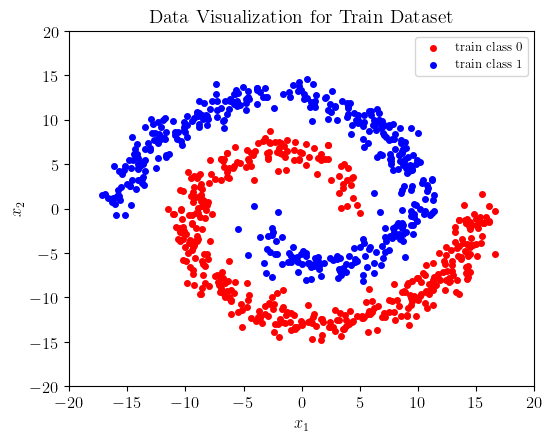

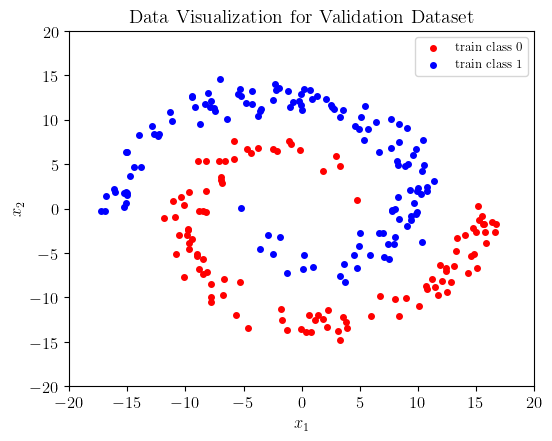

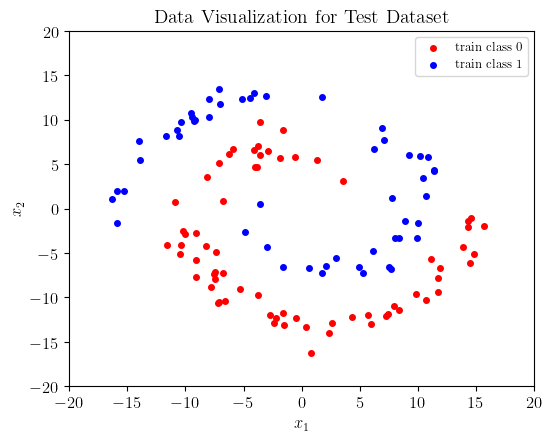

In [50]:
visualise_data(xtrain,ytrain,'Train')
visualise_data(xval,yval,'Validation')
visualise_data(xtest,ytest,'Test')

### **K-Nearest Neighbours Classification algorithm**

In [5]:
# assigns class for every datapoint 

def knn (x,y,point,output,k) :
    vec         = x - point
    dist        = np.diag(vec@vec.T)
    index       = np.argpartition(dist, k)
    min_dist    = np.vectorize(int)(y[index].T[0]) [0:k]
    pred_class  = np.bincount(min_dist).argmax()
    result      = int(1 - np.abs(output-pred_class))

    return result, pred_class

In [11]:
def generate_grid(k) :
    x = np.linspace(-20,20,100)
    y = np.linspace(-20,20,100)
    X,Y = np.meshgrid(x,y)

    Z = np.zeros((100,100))
    for i in range(100) :
        for j in range(100) :
            class_result, class_label = knn(xtrain,ytrain,np.array( [X[i,j],Y[i,j]] ),0,k)
            Z[i,j] = class_label
    
    return X,Y,Z

def visualise_knn(x,y,str1,X,Y,Z,k) :
    
    class0,class1 = separate(x,y)

    contour1 = plt.contourf(X, Y, np.logical_not(Z), levels=[-0.5, 0.5], colors='red', alpha=0.5)
    below_boundary = mpatches.Patch(color='red',alpha=0.5, label='class 1')

    contour2 = plt.contourf(X, Y,                 Z, levels=[-0.5, 0.5], colors='blue' , alpha=0.5)
    above_boundary = mpatches.Patch(color='blue',alpha=0.5, label='class 0')

    c0 = plt.scatter(class0[:,0], class0[:,1],color='red',label='class 0')
    c1 = plt.scatter(class1[:,0], class1[:,1],color='blue',label='class 1')

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(f'K-Nearest Neighbours for {str1} Dataset with k = {k}')
    plt.margins(0,0)
    plt.xlim(-20,20)
    plt.ylim(-20,20)

    plt.legend(handles=[above_boundary, below_boundary,c0,c1,c00,c11])
    plt.savefig(f'1b_plots\\plot_1b_{str1}_{k}.png',dpi=260)
    plt.show()

In [7]:
# determining the class for every datapoint using the training data as reference 

def classifier(x,y,k) :
    sum = 0
    confusion_matrix=np.array([[0,0],[0,0]])

    for j in range(len(y)) :
        actual_class = int(y[j,0])
        accuracy, pred_class = knn(xtrain,ytrain,x[j,:],y[j,0],k)
        sum = sum + accuracy
        confusion_matrix[pred_class, actual_class] = confusion_matrix[pred_class, actual_class] + 1
        
    print(confusion_matrix)
    print()
    print(f'classification accuracy = {sum*100 /len(y) : .2f}%')
    print()

In [8]:
for k in [1,7,15] :
    print(f'k = {k} : Training results :')
    classifier(xtrain,ytrain,k)
    print(f'k = {k} : validation results :')
    classifier(xval,yval,k)
    print(f'k = {k} : test data results :')
    classifier(xtest,ytest,k)
    print('\n')

k = 1 : Training results :
[[435   0]
 [  0 407]]

classification accuracy =  100.00%

k = 1 : validation results :
[[108   0]
 [  0 130]]

classification accuracy =  100.00%

k = 1 : test data results :
[[68  0]
 [ 0 52]]

classification accuracy =  100.00%



k = 7 : Training results :
[[435   0]
 [  0 407]]

classification accuracy =  100.00%

k = 7 : validation results :
[[108   1]
 [  0 129]]

classification accuracy =  99.58%

k = 7 : test data results :
[[68  0]
 [ 0 52]]

classification accuracy =  100.00%



k = 15 : Training results :
[[435   1]
 [  0 406]]

classification accuracy =  99.88%

k = 15 : validation results :
[[108   1]
 [  0 129]]

classification accuracy =  99.58%

k = 15 : test data results :
[[67  0]
 [ 1 52]]

classification accuracy =  99.17%





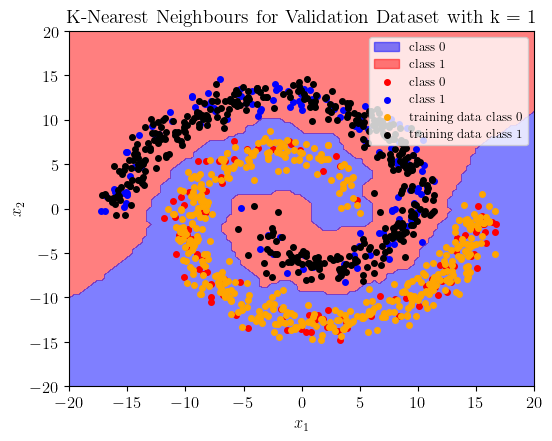

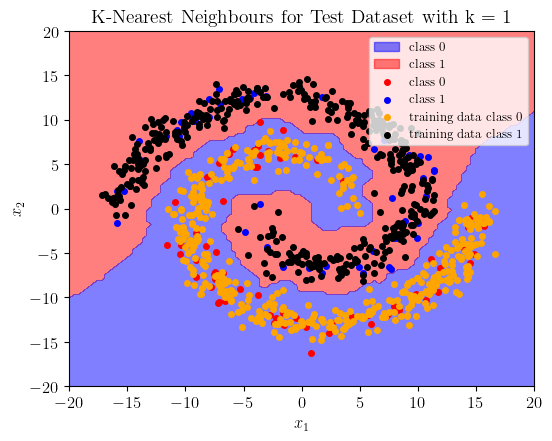

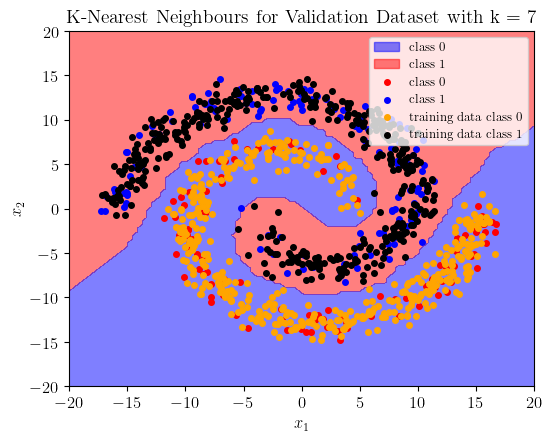

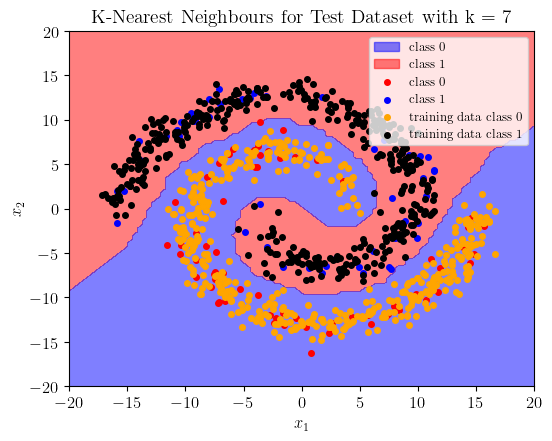

KeyboardInterrupt: 

In [10]:
for k in [1,7,15] :
    X,Y,Z = generate_grid(k)
    visualise_knn(xtrain,ytrain,'Train',X,Y,Z,k)
    visualise_knn(xval,yval,'Validation',X,Y,Z,k)
    visualise_knn(xtest,ytest,'Test',X,Y,Z,k)

---
### **Naive Bayes Classifier**
Computing the Prior Probabilities

In [13]:
P0 = 435/842
P1 = 407/842

Determining the Covariance matrix guess needed for each class in classifier

In [14]:
train0,train1 = separate(xtrain,ytrain)
def calculate_covariance(var) :
    cvar = var - var.mean(axis=0)
    cov  = cvar.T@cvar/len(var)
    return cov

# Sample Covariance of elements in class 0 
cov0 = calculate_covariance(train0)
print(cov0,'\n')

# Sample Covariance of elements in class 1
cov1 = calculate_covariance(train1)
print(cov1)

[[ 73.91529612 -13.24455008]
 [-13.24455008  43.10301911]] 

[[ 72.72655458 -13.20595534]
 [-13.20595534  43.64598122]]


Obtaining the decision boundary parameters using Bayes Rule

In [15]:
def nb_decision_boundary(u1,u2,C1,C2,P1,P2) :
    a2 = - 0.5*( linal.inv(C1) - linal.inv(C2) )
    a1 =   (u1.T@linal.inv(C1) - u2.T@linal.inv(C2))
    a0 = - 0.5*(u1.T@linal.inv(C1)@u1 - u2.T@linal.inv(C2)@u2) + np.log(P1/P2) - 0.5*np.log(linal.det(C1)/linal.det(C2))
    return a2,a1,a0


def plot_classifier(x,y,q0,q1,q2,str1,str2,name): 
    class0,class1   = separate(x, y)

    x = np.linspace(-20,20,400)
    y = np.linspace(-20,20,400)
    X,Y = np.meshgrid(x,y)

    Z = q2[0,0]*X**2 + 2*q2[1,0]*X*Y + q2[1,1]*Y**2 + q1[0,0]*X + q1[0,1]*Y + q0[0,0]
    
    plt.contour(X, Y, Z, levels=0, colors='black', linestyles='-.')
    decision_boundary = mpatches.Patch(color='black', label='Decision boundary')
    
    plt.contourf(X, Y, Z, levels=[-100,0], colors='red', alpha=0.5) 
    below_boundary = mpatches.Patch(color='red',alpha=0.5, label='class 1')

    plt.contourf(X, Y, Z, levels=[0,100], colors='blue', alpha=0.5)
    above_boundary = mpatches.Patch(color='blue',alpha=0.5, label='class 0')

    c0 = plt.scatter(class0[:,0], class0[:,1],color='red',label='class 0')
    c1 = plt.scatter(class1[:,0], class1[:,1],color='blue',label='class 1')

    plt.legend(handles=[above_boundary, decision_boundary, below_boundary, c0, c1])
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(f'Bayes Classification for {str1}\n [ {str2} covariance matrices for classes ]')
    plt.margins(0,0)
    plt.xlim(-20,20)
    plt.ylim(-20,20)
    plt.savefig(f'1b_plots\\plot_1b_{name}.png',dpi=260)
    plt.show()

In [16]:
# 1 : class0 
# mean of class0 : sample mean
# variance of class0 : sample variance

u1 = train0.mean(axis=0).reshape(2,1)
C1 = cov0
P1 = P0

# 2 : class1
# mean of class1 : sample mean
# variance of class1 : sample variance

u2 = train1.mean(axis=0).reshape(2,1)
C2 = cov1
P2 = P1

In [32]:
q2, q1, q0 = nb_decision_boundary(u1,u2, C1,C2 , P1,P2)

cl = 0 
count = 0
X = xtrain
Y = ytrain
samples = len(Y)
confusion_matrix = np.array([[0,0],[0,0]])

for j in range(samples) : 
    x = X[j,:].reshape(2,1)
    c = x.T@q2@x  + q1@x + q0
    actual_class = int(Y[j,0])

    if (c>0) :
        cl = 0
    elif (c<0) :
        cl = 1
    else :
        print("decision boundary")

    count = count + 1 - np.abs(cl - Y[j,0]) 
    confusion_matrix[cl,actual_class] = confusion_matrix[cl,actual_class] + 1
    
print(confusion_matrix) 
print('classification accuracy : ', count/samples*100)
    

[[317 119]
 [118 288]]
classification accuracy :  71.85273159144893


In [35]:
q2

array([[ 1.16103953e-04,  1.43497735e-06],
       [ 1.43497735e-06, -1.54226430e-04]])

In [36]:
q1

array([[-0.00781607, -0.20862144]])

In [39]:
q0

array([[-0.03388611]])

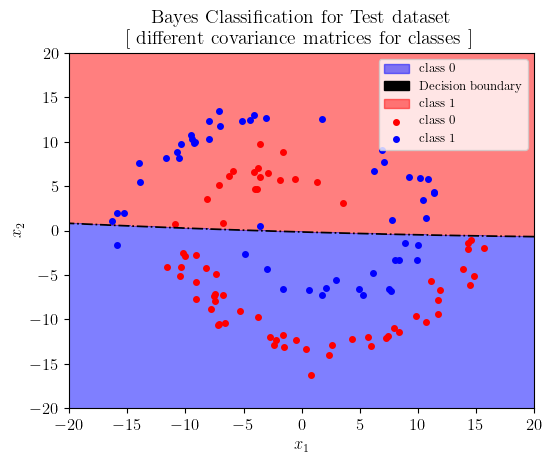

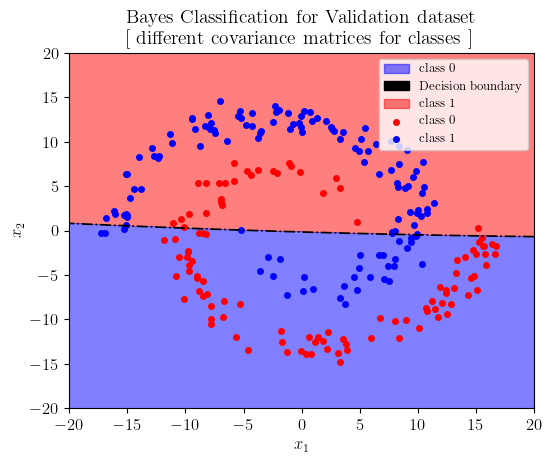

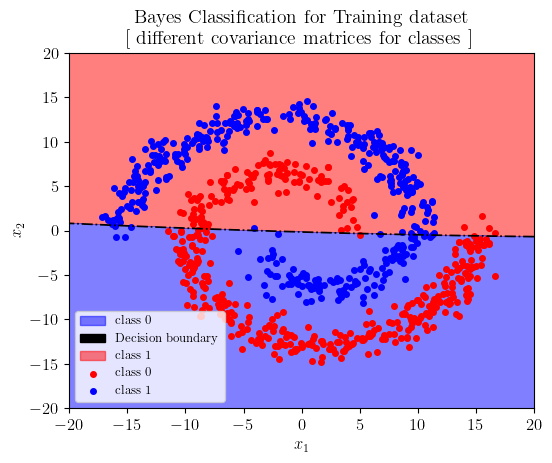

In [38]:
plot_classifier(xtest,ytest,q0,q1,q2,'Test dataset','different','1')
plot_classifier(xval,yval,q0,q1,q2,'Validation dataset','different','2')
plot_classifier(xtrain,ytrain,q0,q1,q2,'Training dataset','different','3')